In [33]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import pandas as pd
import os.path

data_sufix = 'data/'

In [34]:
%matplotlib inline

In [35]:
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [36]:
hashtags = ['h1b', 'usvisa', 'illegalImmigration', 'immigration',
'immigrantcaravan', 'caravaninvasion', 'buildthewall', 'illegalaliens']
remaining = ['birthrightcitizenship', 'immigrationreform']

In [37]:
resTweets = pd.read_sql_query('SELECT hashtag.name AS tag, COUNT(tweet.tweet_id) AS tweets, \
COUNT (DISTINCT user.user_id) AS distinct_tweeting_users \
FROM hashtag \
JOIN tweet ON tweet.hashtag_id = hashtag.id \
JOIN user ON tweet.user_id = user.user_id \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
GROUP BY hashtag.name \
ORDER BY COUNT(tweet.tweet_id) DESC', engine)
print(resTweets)

                  tag  tweets  distinct_tweeting_users
0        buildthewall    8608                     3903
1         immigration    3829                     2676
2     caravaninvasion    3172                     1919
3  illegalImmigration     751                      430
4       illegalaliens     680                      426
5    immigrantcaravan     356                      307
6                 h1b     181                       65
7              usvisa      19                       12


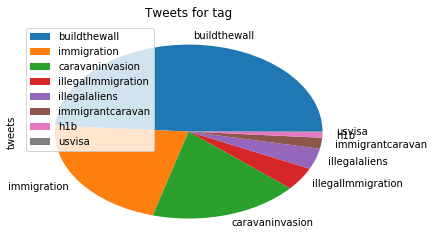

In [38]:
resTweets[["tag", "tweets"]].set_index('tag').plot.pie('tweets', title="Tweets for tag")

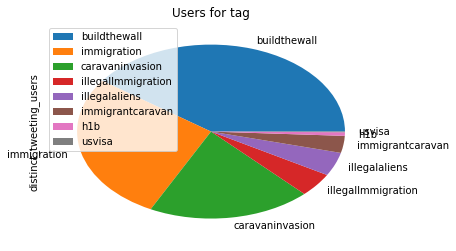

In [39]:
resTweets[["tag", "distinct_tweeting_users"]].set_index('tag').plot.pie('distinct_tweeting_users', title="Users for tag")

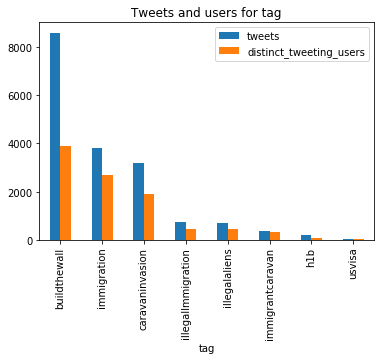

In [40]:
resTweets.set_index('tag').plot.bar(title="Tweets and users for tag")

In [41]:
retTweets = pd.read_sql_query('SELECT hashtag.name AS tag, COUNT(retweet.retweet_id) AS retweets \
FROM hashtag \
JOIN tweet ON tweet.hashtag_id = hashtag.id \
JOIN retweet ON retweet.source_tweet_id = tweet.tweet_id \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
GROUP BY hashtag.name \
ORDER BY COUNT(retweet.retweet_id) DESC', engine)
print(retTweets)

                  tag  retweets
0        buildthewall     55292
1     caravaninvasion     15027
2         immigration      9169
3  illegalImmigration      2837
4       illegalaliens      2780
5    immigrantcaravan      1671
6                 h1b       213
7              usvisa         5


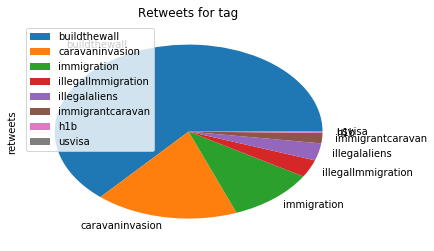

In [42]:
retTweets.set_index('tag').plot.pie("retweets", title="Retweets for tag")

In [43]:
resDatesTags = pd.read_sql_query('SELECT hashtag.name AS tag, DATE(tweet_created_at) AS date, \
COUNT(DISTINCT tweet_id) AS tweets_per_day \
FROM hashtag \
JOIN tweet ON tweet.hashtag_id = hashtag.id \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
GROUP BY hashtag.name, DATE(tweet_created_at)', engine)
print(resDatesTags)

                   tag        date  tweets_per_day
0         buildthewall  2018-10-27            1474
1         buildthewall  2018-10-28            1703
2         buildthewall  2018-10-29            2589
3         buildthewall  2018-10-30            2842
4      caravaninvasion  2018-10-27             594
5      caravaninvasion  2018-10-28             492
6      caravaninvasion  2018-10-29             941
7      caravaninvasion  2018-10-30            1145
8                  h1b  2018-10-27              33
9                  h1b  2018-10-28              26
10                 h1b  2018-10-29              56
11                 h1b  2018-10-30              66
12  illegalImmigration  2018-10-27             116
13  illegalImmigration  2018-10-28             119
14  illegalImmigration  2018-10-29             208
15  illegalImmigration  2018-10-30             308
16       illegalaliens  2018-10-27              24
17       illegalaliens  2018-10-28             104
18       illegalaliens  2018-10

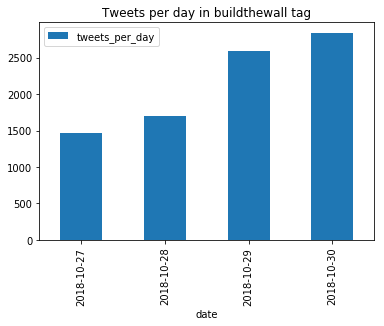

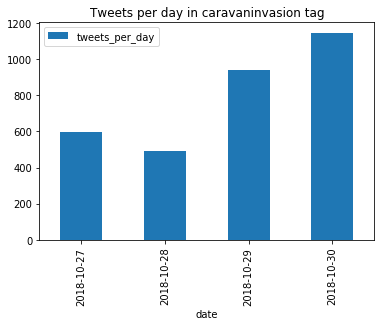

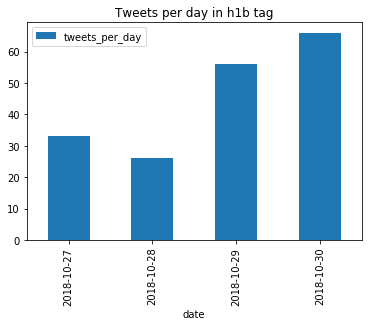

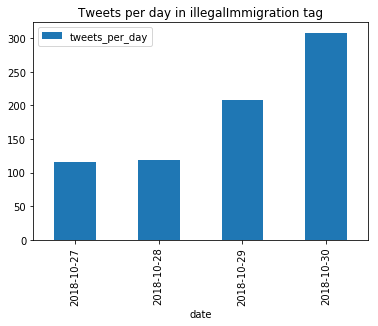

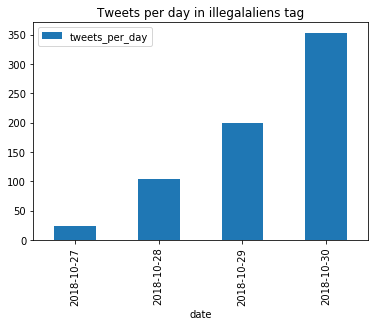

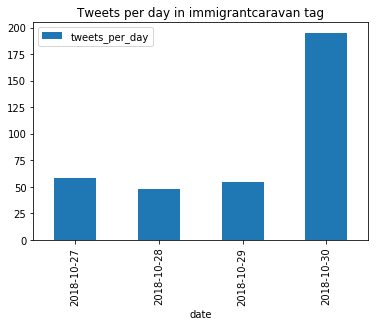

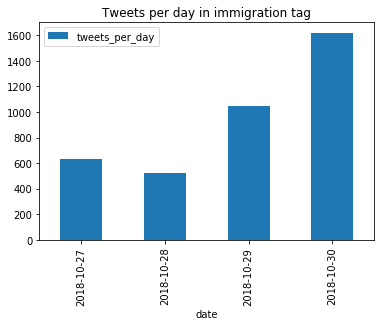

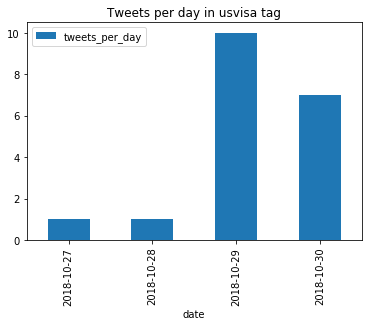

In [44]:
for tag, resDatesTagsDivide in resDatesTags.groupby('tag'):
    resDatesTagsDivide.set_index('tag').plot.bar("date", title="Tweets per day in " + tag + " tag")

In [45]:
resDates = pd.read_sql_query('SELECT DATE(tweet_created_at) AS date, \
COUNT(DISTINCT tweet.tweet_id) AS tweets_per_day, \
COUNT(DISTINCT user.user_id) AS distinct_users_per_day \
FROM tweet \
JOIN user ON tweet.user_id = user.user_id \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
GROUP BY DATE(tweet_created_at)', engine)
print(resDates)

         date  tweets_per_day  distinct_users_per_day
0  2018-10-27            2795                    1879
1  2018-10-28            2866                    1867
2  2018-10-29            4845                    3062
3  2018-10-30            6165                    4007


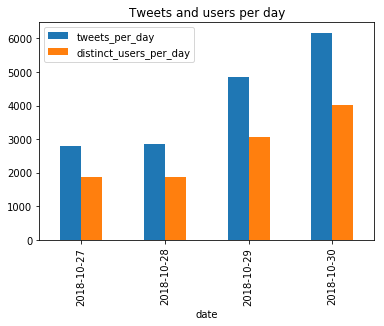

In [46]:
resDates.plot.bar("date", title="Tweets and users per day")

In [47]:
# Korelacja pomiędzy followers_count usera a łączną liczbą retweetów postów usera
# Wyłonienie najbardziej wpływowych użytkowników sieci

resRetweetUserFriends = pd.read_sql_query('SELECT COUNT(DISTINCT retweet.retweet_id) AS total_retweets, \
COUNT(DISTINCT tweet.tweet_id) AS tweets_got_retweeted, \
user.followers_count AS followers, user.user_name as user \
FROM retweet \
INNER JOIN tweet ON retweet.source_tweet_id = tweet.tweet_id \
INNER JOIN user ON tweet.user_id = user.user_id \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
GROUP BY(user.user_id) \
ORDER BY COUNT(DISTINCT retweet.retweet_id) DESC \
LIMIT 10', engine)
print(resRetweetUserFriends)

   total_retweets  tweets_got_retweeted  followers                        user
0            7852                     5      92129                Patriot Gary
1            6489                     1      66644                   TheKat ❤️
2            5107                     4      34121                        Cody
3            3303                    53      21566    fordnFLA777 (K)♥️✝️ ❤️✡️
4            1717                     3      73262            🇺🇸 SKY45 🇺🇸 ︻デ═一
5            1538                    27      20299       GO RED STATE BY STATE
6            1461                     2     178318    🦅 🦅 Nationalist Eagle 🦅🦅
7            1412                     3      25052            Jennifer 🔱🇺🇸🔱🌟🌟🌟
8            1192                     1      34039  Chris  🇺🇸 Let Freedom Ring
9            1127                     3      58527              Laura Vote Red


In [48]:
#Time analyse
timeTweets = pd.read_sql_query('SELECT tweet_id AS id, DATETIME(tweet_created_at) AS crdate FROM tweet \
WHERE DATE(tweet.tweet_created_at) < DATE("2018-11-10") \
AND tweet.hashtag_id < 9', engine)
# print(timeTweets)

In [49]:
from datetime import datetime
def swith_to_datatime(crdate):
    return datetime.strptime(crdate, '%Y-%m-%d %H:%M:%S')

def get_day_hour_str(date):
    if len(str(date.hour)) == 1:
        return str(date.date()) + " at 0" + str(date.hour)
    else:
        return str(date.date()) + " at " + str(date.hour)

In [50]:
for i, row in timeTweets.iterrows():
    dateObject = swith_to_datatime(row["crdate"])
    timeTweets.at[i,'crdate'] = dateObject
    timeTweets.at[i, "day_time"] = get_day_hour_str(dateObject)

# print(timeTweets)

/Users/anna/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


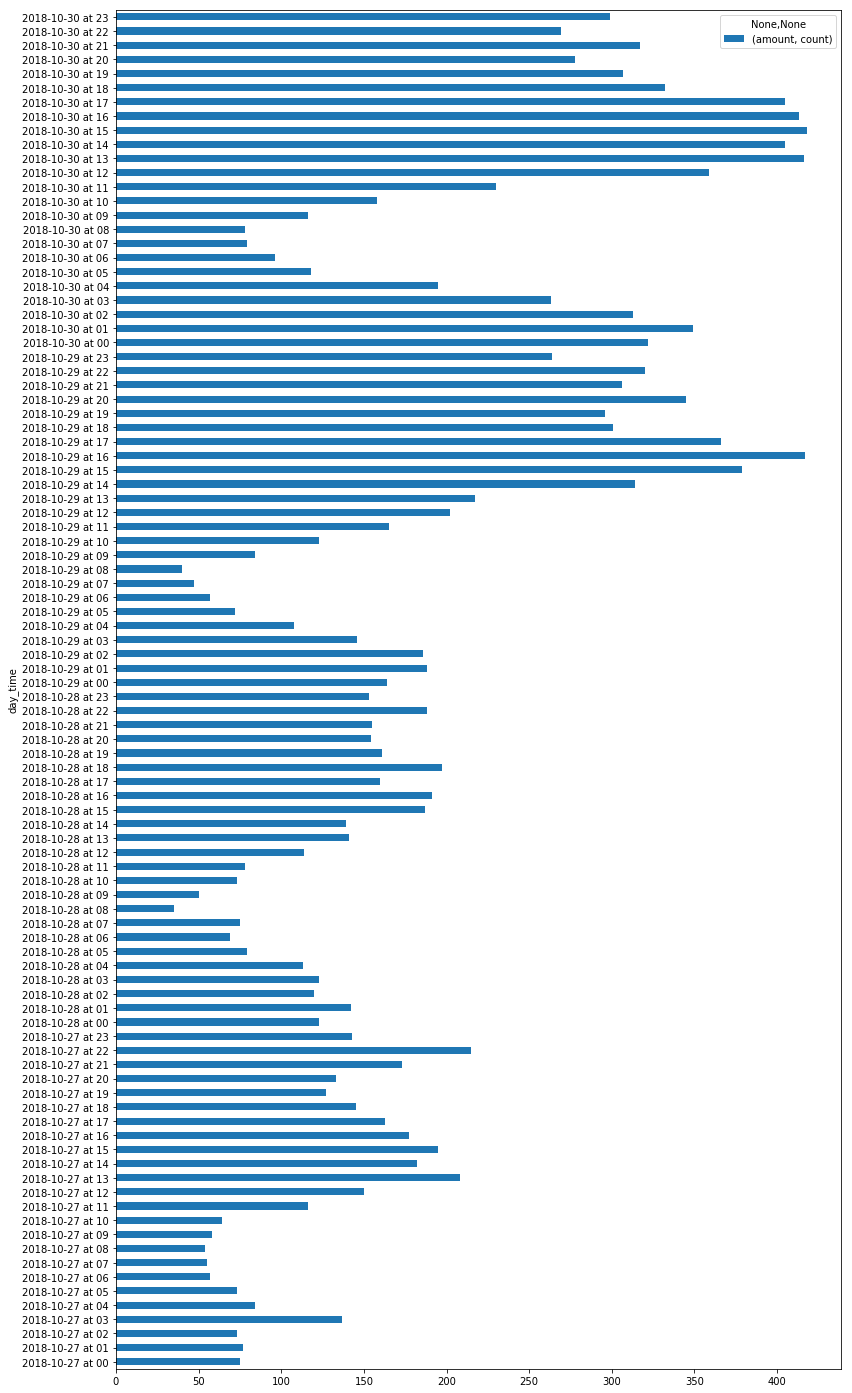

In [51]:
img = timeTweets[['id', 'day_time']].groupby(['day_time']).agg(['count']).rename(columns={'id': 'amount'})
img.plot.barh(y=["amount"], figsize=(13,25))